### I,II. Import thư viện 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### III. Khám phá dữ liệu

In [2]:
# Đọc file train, test
train_df = pd.read_csv('./titanic/train.csv')
test_df = pd.read_csv('./titanic/test.csv')

In [3]:
# các cột của train và test 
print(train_df.columns)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(train_df.info())
print("***********")
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
***********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int6

#### Kiểm tra thuộc tính target (các lớp cần phân loại của bài toán)

In [14]:
train_df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


#### Vẽ đồ thị dạng cột cho thuộc tính "Sex"

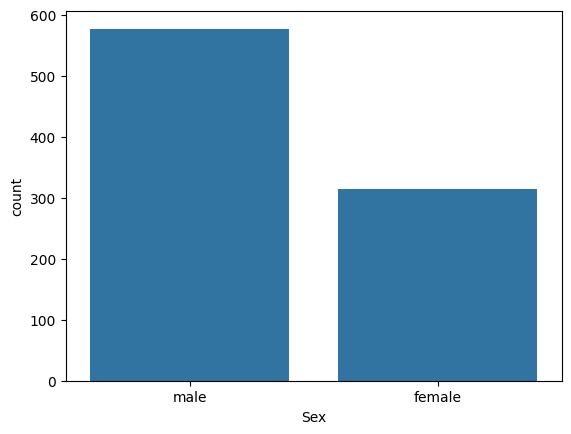

In [7]:
sns.countplot(data=train_df,x='Sex');

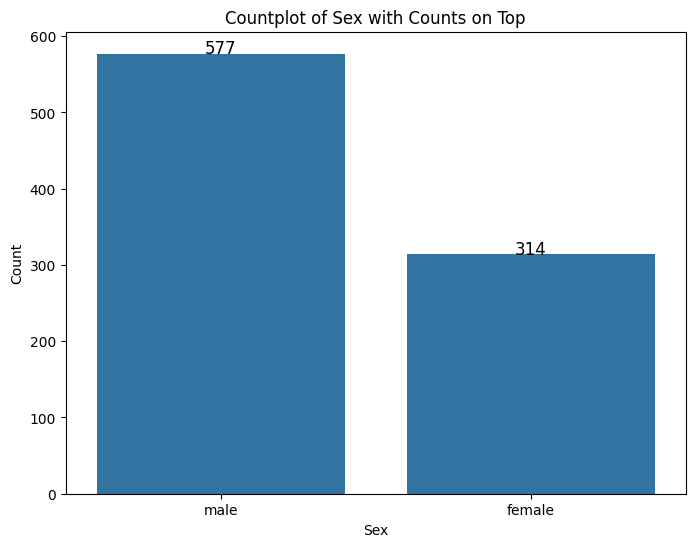

In [9]:
# Vẽ biểu đồ countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='Sex')

# Thêm số liệu lên mỗi cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black')

# Hiển thị biểu đồ
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Countplot of Sex with Counts on Top')
plt.show()

#### Vẽ biểu đồ thể hiện sự tương quan giữa giới tính 
- (thuộc tính dạng category, vd:
Sex, Pclass…) và việc survive(chỉ trong seaborn mới có chức năng này, matplotlib
ko có):

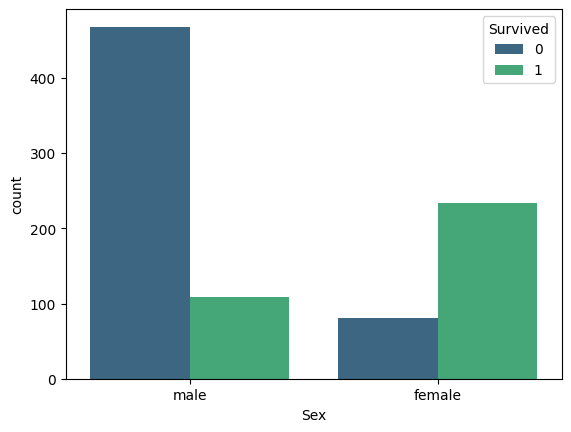

In [8]:
sns.countplot(data=train_df,x='Sex', hue='Survived',palette='viridis');

#### Xem thống kê mô tả về thuộc tính "Age"

In [10]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Chia khoảng giá trị cho thuộc tính có nhiều giá trị (Numerical), vd: Fare, Age…

In [11]:
fare_categories = ['Economic','Standard','Expensive','Luxury']
pd.qcut(train_df['Fare'],4,labels = fare_categories)
pd.qcut(test_df['Fare'],4,labels = fare_categories)

0       Economic
1       Economic
2       Standard
3       Standard
4       Standard
         ...    
413     Standard
414       Luxury
415     Economic
416     Standard
417    Expensive
Name: Fare, Length: 418, dtype: category
Categories (4, object): ['Economic' < 'Standard' < 'Expensive' < 'Luxury']

#### Xem độ tương quan của fare với survive sau khi chia khoảng:

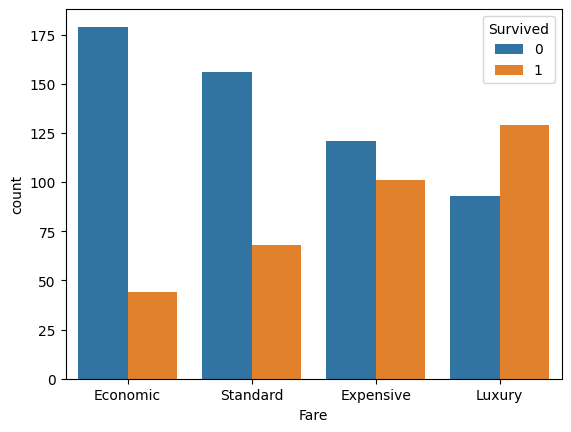

In [13]:
fare_categories = ['Economic','Standard','Expensive','Luxury']
qt_data=pd.qcut(train_df['Fare'],4,labels = fare_categories)
sns.countplot(data = train_df, x=qt_data,hue=train_df['Survived']);

### IV. Feature engineering (tạo các feature mới có ích…)

#### Kết hợp 2 cột thuộc tính Sibsp và Parch thành 1 cột thuộc tính mới Family_Size


In [14]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int')+1
test_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int')+1

#### Xem độ tương quan của Family_Size với Survived:

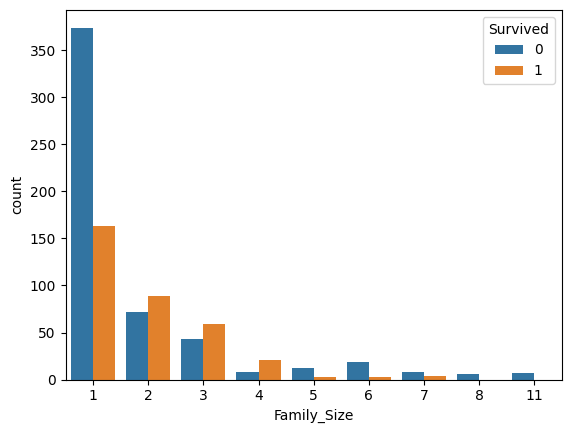

In [15]:
sns.countplot(data = train_df, x='Family_Size', hue ='Survived');

In [16]:
pd.cut(train_df['Family_Size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large'])
pd.cut(test_df['Family_Size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large'])

0      Small
1      Small
2       Solo
3      Small
4       Solo
       ...  
413     Solo
414     Solo
415     Solo
416    Small
417    Small
Name: Family_Size, Length: 418, dtype: category
Categories (4, object): ['Solo' < 'Small' < 'Medium' < 'Large']

#### Đặt tên mới cho thuộc tính sau khi chia khoảng

In [17]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large'])
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large'])

#### Xem độ tương quan của Family_Cat với Survived:


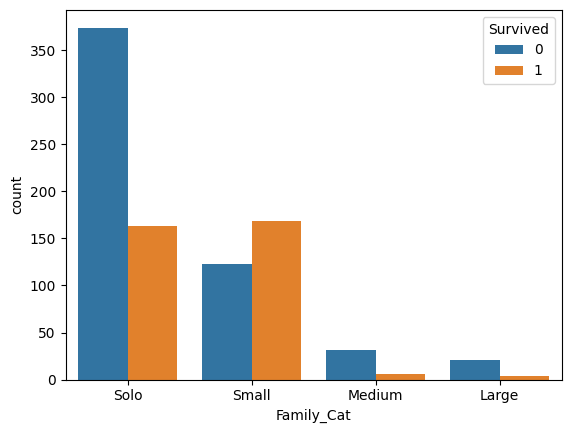

In [18]:
sns.countplot(data = train_df, x='Family_Cat',hue='Survived');

### V. Data wrangling (tiền xử lý dữ liệu: điền những giá trị missing, clean dữ liệu…)


#### Xác định lại các thuộc tính dùng để train mô hình:

In [19]:
num_features =['Age','Fare']
cat_features =['Sex','Pclass','Embarked','Family_Cat']
feature_cols = num_features+cat_features
print(fare_categories)

['Economic', 'Standard', 'Expensive', 'Luxury']


#### Kiểm tra xem thuộc tính nào bị thiếu giá trị:

In [20]:
def display_missing(df,feature_cols):
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f'Col {col} hass {missing_count} missing values')
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Col Age hass 177 missing values
Col Embarked hass 2 missing values
Col Age hass 86 missing values
Col Fare hass 1 missing values


#### Điền giá trị bị thiếu:

In [21]:
# tìm độ tuổi trung bình theo thuộc tính Sex và Pclass:
train_df.groupby(['Sex','Pclass'])['Age'].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

+ Điền các giá trị thiếu của Age bởi giá trị trung bình tương ứng dựa theo Sex và Pclass:

In [22]:
train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

+ Chuẩn bị dữ liệu để train mô hình và thực hiện các thao tác chuẩn hoá:

In [23]:
X=train_df[feature_cols]
X.tail()

,Age,Fare,Sex,Pclass,Embarked,Family_Cat
886,27.0,13.00,male,2,S,Solo
887,19.0,30.00,female,1,S,Solo
888,21.5,23.45,female,3,S,Small
889,26.0,30.00,male,1,C,Solo
890,32.0,7.75,male,3,Q,Solo


In [24]:
y=train_df['Survived']
y.tail()

886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

+ Age thiếu nhiều nên phải điền, còn Embarked và Fare thiếu ít hơn thì sẽ
dùng scikit-learn để tự động điền:
- Embarked là kiểu categories nên điền theo most frequence
- Fare kiểu num nên điền theo mean
+ Mã hoá OnehotEncoder cho các thuộc tính kiểu cat, vd: Sex, Embarked…
+ Scaler cho các thuộc tính num


In [25]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_transformer = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy = 'median')),
        ('scaler',StandardScaler())
    ]
)
cat_transformer = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy = 'most_frequent')),
        ('scaler',OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [53]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])

In [54]:
X=preprocessor.fit_transform(X)

In [56]:
X_test=test_df[feature_cols]

In [57]:
X_test = preprocessor.transform(X_test)

### VI. Huấn luyện mô hình

- Chia dữ liệu huấn luyện thành tập train và validation:

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

- Xem số lượng dữ liệu sau khi chia:


In [60]:
X_train.shape

(712, 14)

#### Huấn luyện mô hình với Decision Tree

In [61]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

+ Xem độ chính xác của mô hình trên tập va lidation

In [62]:
decision_tree.score(X_val,y_val)

0.7932960893854749

+ Thay đổi các tham số của mô hình để nâng cao độ cx:

In [64]:
decision_tree = DecisionTreeClassifier(
    max_depth=5,
    criterion='entropy',
    random_state=2022
)

# Huấn luyện mô hình
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)